In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import os
import fastparquet
import warnings
import geopy
from geopy.point import Point
import time
from pandas.core.common import SettingWithCopyWarning
import plotly
import plotly.graph_objects as go
import plotly.express as px
from urllib.request import urlopen
import json
from datetime import datetime, timedelta, date
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
# Load in price data with delta lake tables
price_trend = pd.read_parquet('C:/Users/mattg/Desktop/Hobbies/airbnb_reports/bucket_data/price_deltalake')

In [ ]:
data_w_listing_loc = pd.read_csv('post_mort_and_roi_calcs_june19.csv')
data_w_listing_loc = data_w_listing_loc[['id','zipcode','City','Metro','CountyName','State']]
price_trend['id'] = price_trend['id'].astype('float64')
price_trend_wloc = price_trend.merge(data_w_listing_loc, how='inner', on='id')
price_trend_wloc['CountyName'] = price_trend_wloc['CountyName'].str.strip(' County')

In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

#with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/fl_florida_zip_codes_geo.min.json') as response:
#    zipcodes = json.load(response)

last_date_pulled = price_trend_wloc['day_pulled'].max()
recent_price_trend_wloc = price_trend_wloc[price_trend_wloc['day_pulled'] == last_date_pulled]
recent_price_trends_countyformap = recent_price_trend_wloc.groupby('CountyName').mean('avg_nightly_price_pct_change').reset_index()

fig = px.choropleth(recent_price_trends_countyformap, 
                    geojson=counties, 
                    locations='CountyName', 
                    color='avg_nightly_price_pct_change',
                    color_continuous_scale="RdYlGn",
                    featureidkey="properties.ZCTA5CE10",
                    range_color=(-100,100),
                    scope="usa"
                    #labels={'Price Change':'Cluster_Category'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
filename = "newsletter_features/florida_price_trends_heatmap_county_weekly.png"
fig.write_image(filename, engine='kaleido', width=875, height=700)
fig.show()

In [ ]:
price_trend_wloc_zip = price_trend_wloc.groupby(['zipcode','day_pulled']).mean('avg_nightly_price_pct_change').reset_index()
fig_line_prices_zips = px.line(price_trend_wloc_zip, x="day_pulled", y="avg_nightly_price_pct_change", color='zipcode', markers=True, labels={
                     "day_pulled": "Date",
                     "avg_nightly_price_pct_change": "Pct Price Change"
                 })
fig_line_prices_zips.update_layout(title='Price Changes W/W Monday-Sunday')
#fig_line_prices_zips.update_yaxes(range=[-100, 100])
filename = "newsletter_features/recent_price_trends_lines_zip_weekly.png"
fig_line_prices_zips.write_image(filename, engine='kaleido', width=875, height=700)
fig_line_prices_zips.write_html('newsletter_features/recent_price_trends_lines_zip_weekly.html')
fig_line_prices_zips.show()

In [ ]:
# Load in occupancy data with delta lake tables
occ_trend = pd.read_parquet('C:/Users/mattg/Desktop/Hobbies/airbnb_reports/bucket_data/occupancy_deltalake')

In [ ]:
pull_dates = occ_trend.day_pulled.unique().sort()

In [ ]:
data_w_listing_loc = pd.read_csv('post_mort_and_roi_calcs_june19.csv')
data_w_listing_loc = data_w_listing_loc[['id','zipcode','City','Metro','CountyName','State']]
occ_trend['id'] = occ_trend['id'].astype('float64')
occ_trend_wloc = occ_trend.merge(data_w_listing_loc, how='inner', on='id')
occ_trend_wloc['CountyName'] = occ_trend_wloc['CountyName'].str.strip(' County')

In [ ]:
#recent_price_trend_wloc_zip_dow_linechart = recent_price_trend_wloc.groupby(['zipcode','day_of_week']).mean('avg_nightly_price_pct_change').reset_index()
occ_trend_wloc_zip = occ_trend_wloc.groupby(['zipcode','day_pulled']).mean('occ_pct_change').reset_index()
fig_line_occ_zips = px.line(occ_trend_wloc_zip, x="day_pulled", y="occ_pct_change", color='zipcode', markers=True, labels={
                     "day_pulled": "Date",
                     "occ_pct_change": "Pct Occupancy Change"
                 })
fig_line_occ_zips.update_layout(title='Occupancy Rate Changes W/W Monday-Sunday')
#fig_line_occ_zips.update_yaxes(range=[-100, 100])
filename = "newsletter_features/recent_occ_trends_lines_zip_weekly.png"
fig_line_occ_zips.write_image(filename, engine='kaleido', width=875, height=700)
fig_line_occ_zips.write_html('newsletter_features/recent_occ_trends_lines_zip_weekly.html')
fig_line_occ_zips.show()

In [ ]:
occ_trend_wloc_zip[occ_trend_wloc_zip['zipcode'] == 33137].tail(25)

In [2]:
####################

In [7]:
# Pull in joined_viz_table
viz_df = pd.read_parquet('C:/Users/mattg/Desktop/Hobbies/airbnb_reports/joined_viz_table/')

In [8]:
viz_df.columns

Index(['id', 'day_pulled', 'occupancy_pct', 'occupancy_pct_lag_7_day',
       'occ_pct_change', 'avg_cleaning_fee', 'avg_service_fee',
       'avg_nightly_price', 'avg_cleaning_fee_lag_7_day',
       'avg_service_fee_lag_7_day', 'avg_nightly_price_lag_7_day',
       'avg_cleaning_fee_pct_change', 'avg_nightly_price_pct_change', 'town',
       'property_category', 'town_state', 'zipcode', 'road', 'city', 'county',
       'state', 'country', 'config_name', 'postprocess_date'],
      dtype='object')

In [9]:
viz_df.shape

(569167, 24)

In [13]:
viz_df.to_parquet('viz_df.parquet.gzip',compression='gzip')  
#pd.read_parquet('viz_df.parquet.gzip')

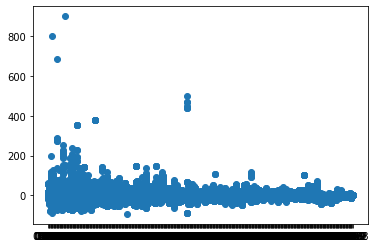

In [12]:
viz_df=viz_df.dropna()
plt.scatter(viz_df['zipcode'], viz_df['avg_nightly_price_pct_change'])

In [ ]:
viz_df.shape